# Bank Churn Prediction

## 1. Set-up

In [2]:
# Import necessary libraries:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
sns.set_style("darkgrid")
 
%matplotlib inline

In [3]:
# Import the data: This dataset is taken from Kaggle
churn_data = pd.read_csv('churn_modelling.csv')

In [4]:
churn_data.shape

(10000, 14)

In [5]:
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# Statistical Summary of the data:
churn_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


---

## 2. EDA

<AxesSubplot:xlabel='Exited', ylabel='count'>

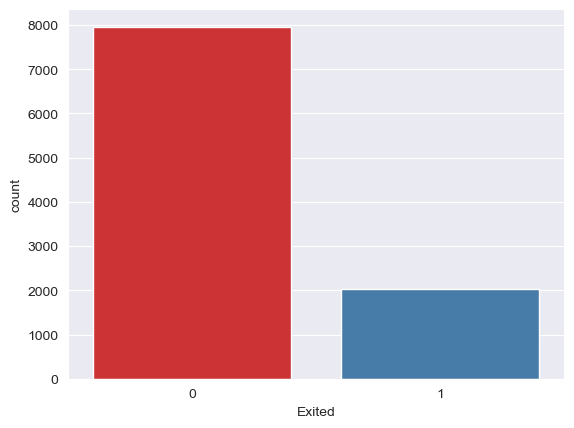

In [19]:
# Number of customers who left the bank versus those who didn’t.
sns.countplot(x='Exited', data=churn_data, palette="Set1")

You can see that around 2,000 customers left the bank after six months.

<AxesSubplot:xlabel='Geography', ylabel='count'>

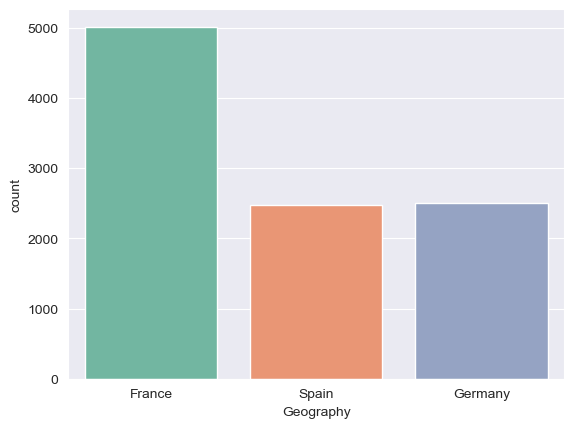

In [17]:
# Total number of customers per geographical location.

sns.countplot(x='Geography', data=churn_data, palette="Set2")

The customers belong to three different geographical locations: France, Spain, and Germany. While almost 50% of the total customers are French, the number of Spanish and German customers is around 25% each.

<AxesSubplot:xlabel='Exited', ylabel='count'>

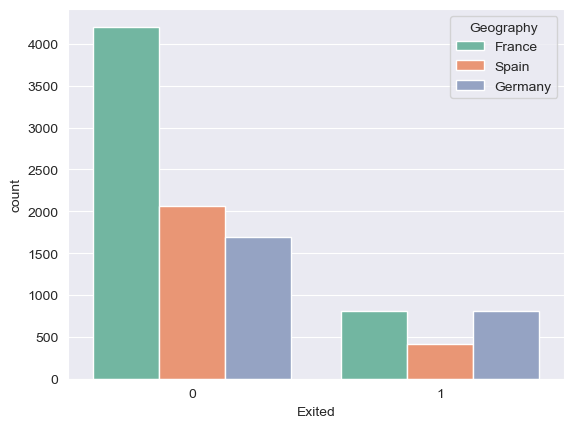

In [16]:
# Count of values from the “Exited” column against a customer’s geography:

sns.countplot(x='Exited', hue='Geography', data=churn_data, palette="Set2")

The output shows that among the customers who left the bank, French and German customers have an equal number despite the fact that the total German customers are almost half of the total French customers. It shows that German customers are more likely to leave the bank than French and Spanish customers. 

<AxesSubplot:xlabel='Exited', ylabel='Age'>

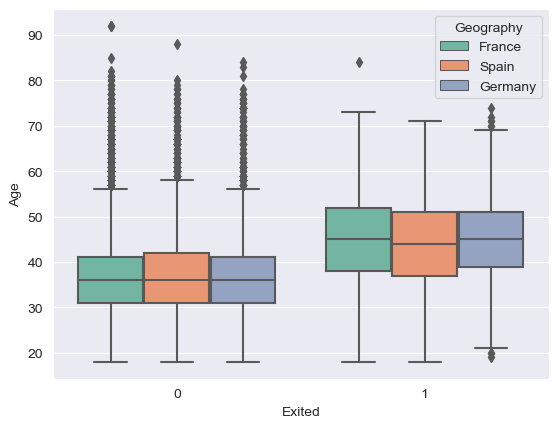

In [20]:
# Impact of age and geography on customer churn:

sns.boxplot(x='Exited', y= "Age", hue="Geography", data=churn_data, palette="Set2")


The box plot plots the quartile information for a column in boxes. On the left side, you can see three boxes (each for one geographical location) that contain quartile information of age for the customers who didn’t leave the bank. You can see that the customers between the age of 30 and 40 are more likely to stay for all three geographical locations. Similarly, from the three boxes on the right, it can be inferred that customers in the age group of around 40 to 50 are more likely to leave the bank.

<AxesSubplot:xlabel='Exited', ylabel='Age'>

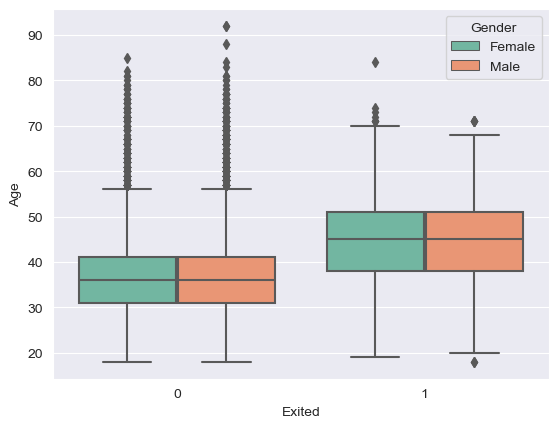

In [21]:
# Relationship between age, gender, and customer churn:

sns.boxplot(x='Exited', y= "Age", hue="Gender", data=churn_data, palette="Set2")


Here again, irrespective of the gender, the customer in the age group of 30-40 are likely to stay while those in the age group of 40-50 are likely to leave the bank.

<AxesSubplot:xlabel='Exited', ylabel='Balance'>

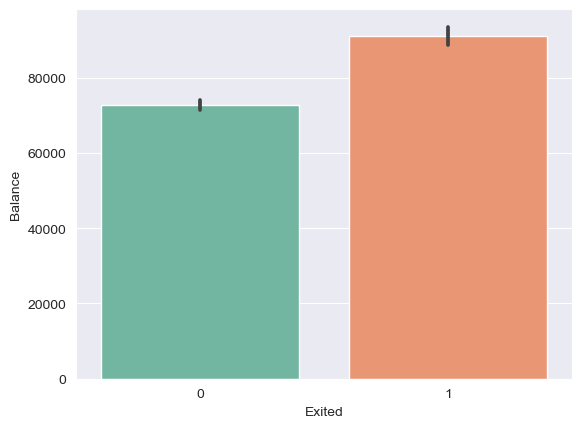

In [22]:
# Impact of balance on customer churn:

sns.barplot(x='Exited', y= "Balance", data=churn_data, palette="Set2")


The output shows that the average balance of the customers who left the bank is slightly greater than the average balance of those who stayed. 

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

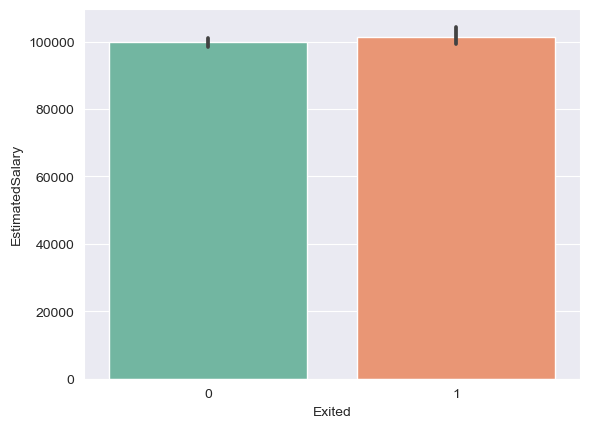

In [23]:
# Relation between estimated salary and the customer churn:

sns.barplot(x='Exited', y= "EstimatedSalary", data=churn_data, palette="Set2")


The average salary of the customers who left the bank and those who didn’t is almost the same.

A customer’s activeness is determined based on the number of transactions in a certain period, the number of logins on the web portal of a bank, etc. The “IsActiveMember” column contains information regarding a customer’s activeness. 

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

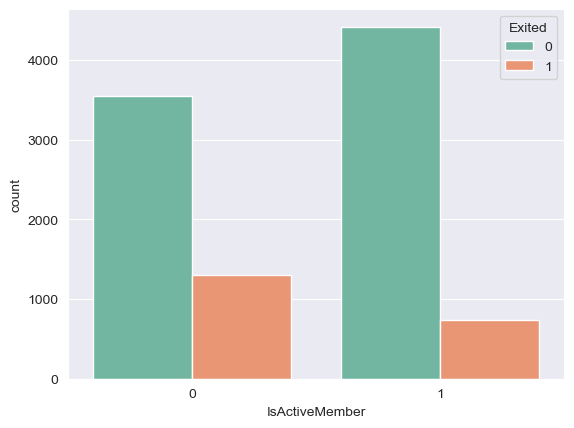

In [24]:
# Relationship between the activeness of a customer on customer churn:

sns.countplot(x='IsActiveMember', hue= "Exited", data=churn_data, palette="Set2")


We can see that the ratio of customers who exited the bank (orange bar) is greater for inactive customers as compared to the active ones. 

---

## 3. Data Preprocessing

The “RowNumber”, “CustomerId”, and “Surname” columns have purely random information and have no impact on customer churn. Hence, we will remove those.

In [25]:
churn_data = churn_data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

Our feature set consists of all the columns except the “Exited” column, which contains the labels or the outputs.

The following script divides the data into feature and label sets.

In [26]:
features =  churn_data.drop(['Exited'], axis=1)
labels = churn_data['Exited']

In our dataset, the “Geography” and “Gender” columns have categorical features. The following script performs One-Hot encoding for these categorical columns and replaces the features with their numeric counterparts.  

In [27]:
temp_data =  features.drop(['Geography', 'Gender'], axis=1)

In [28]:
# One-Hot Encoding:

Geography = pd.get_dummies(features .Geography).iloc[:,1:]
Gender = pd.get_dummies(features.Gender).iloc[:,1:]
 

In [29]:
# Concatenating the above encoded results:

final_feature_set = pd.concat([temp_data,Geography,Gender], axis=1)

---

## 4. Modelling

In [30]:
# Splitting the data into training & testing sets:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_feature_set,
                                                    labels,
                                                    test_size = 0.25,
                                                    random_state = 42)

In [31]:
# XGBoost Training:

model = XGBClassifier(learning_rate =0.1, n_estimators=100 , random_state=42) 
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [32]:
# Make Predictions:

y_pred = model.predict(X_test)

In [33]:
# Evaluation:
print(classification_report(y_test,y_pred ))  
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2003
           1       0.75      0.49      0.60       497

    accuracy                           0.87      2500
   macro avg       0.82      0.73      0.76      2500
weighted avg       0.86      0.87      0.86      2500

0.8672


The output shows an accuracy of `86.72%`. This means that on average, out of 100 times, our algorithm correctly predicts which customers are likely to leave the bank 86.72 times.

### Feature Importance

<AxesSubplot:>

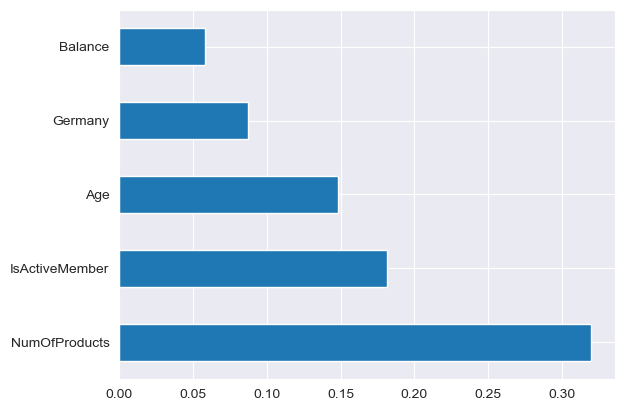

In [34]:
import numpy as np
feat_importances = pd.Series(model.feature_importances_, index=final_feature_set.columns)
feat_importances.nlargest(5).plot(kind='barh')

The output shows that according to our algorithm, `NumOfProducts` is the most important feature to predict customer churn followed by the `IsActiveMember` and the `Age` of the customer. 

---

## 5. Conclusion

Retaining customers is vital for the survival of a business. It is important for organizations to know which customers are going to leave in the near future so that they can take measures to prevent them from leaving. We Analysed the dataset and discovered the important features to predict customer churn with 86% Baseline Model Accuracy.